In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/players-for-data/players.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50) 
%matplotlib inline    
import seaborn as sns; sns.set()

In [4]:
df0 = pd.read_csv('/kaggle/input/players-for-data/players.csv',usecols=['Name','Position','Matches', 'Goals', 'Assists','Markey Value In Millions(£)'])
#code allows needed columns to be extracted from the data set csv file 

print(df0)

                       Name            Position  Markey Value In Millions(£)  \
0             Kylian Mbappé      Centre-Forward                        144.0   
1            Erling Haaland      Centre-Forward                        135.0   
2                Harry Kane      Centre-Forward                        108.0   
3             Jack Grealish         Left Winger                         90.0   
4             Mohamed Salah        Right Winger                         90.0   
..                      ...                 ...                          ...   
495  Giorgian de Arrascaeta  Attacking Midfield                         16.2   
496             Ayoze Pérez      Second Striker                         16.2   
497              Alex Meret          Goalkeeper                         16.2   
498         Duje Caleta-Car         Centre-Back                         16.2   
499         Aritz Elustondo         Centre-Back                         16.2   

     Matches  Goals  Assists  
0       

In [5]:
target_position = 'Centre-Forward' 
df1 = df0.loc[df0['Position'] == target_position] 
#This code allows to filter the dataset for the required position 'Centre-Forward' from the dataset 

#This part of the code make it so only the first 50 players in the dataset are selected and
#resets the index to number the players from 1-50
Selectedrows = df1.head(50).reset_index(drop=True) 
Selectedrows.index = Selectedrows.index + 1 #resets the index to number the players from 1-50
print(Selectedrows)

                         Name        Position  Markey Value In Millions(£)  \
1               Kylian Mbappé  Centre-Forward                        144.0   
2              Erling Haaland  Centre-Forward                        135.0   
3                  Harry Kane  Centre-Forward                        108.0   
4               Romelu Lukaku  Centre-Forward                         90.0   
5            Lautaro Martínez  Centre-Forward                         72.0   
6              Victor Osimhen  Centre-Forward                         54.0   
7               Gabriel Jesus  Centre-Forward                         54.0   
8          Robert Lewandowski  Centre-Forward                         54.0   
9                 Richarlison  Centre-Forward                         49.5   
10                Timo Werner  Centre-Forward                         49.5   
11             Dušan Vlahovic  Centre-Forward                         45.0   
12      Dominic Calvert-Lewin  Centre-Forward                   

In [6]:
dfgoals = Selectedrows['Goals'] #Each data frame was made to have only of the wanted columns in it 
dfassits = Selectedrows['Assists']
dfmatches = Selectedrows['Matches']

dfGandA = dfgoals + dfassits #adds the goals and the assists columns togther 

dfplayerperformancestats = (dfGandA/dfmatches).round(1) # divides combined data frame for the goals and the assists by macthes
dfplayerperformancestats = pd.DataFrame(dfplayerperformancestats).rename(columns={0: 'Goals and Assits Per Match'})
print (dfplayerperformancestats)

    Goals and Assits Per Match
1                          1.1
2                          1.7
3                          0.6
4                          0.5
5                          0.4
6                          0.8
7                          0.6
8                          1.5
9                          0.4
10                         0.3
11                         1.0
12                         1.0
13                         0.5
14                         0.4
15                         0.8
16                         0.6
17                         0.5
18                         0.5
19                         0.5
20                         0.6
21                         0.4
22                         0.9
23                         0.5
24                         0.8
25                         0.2
26                         0.1
27                         0.2
28                         0.6
29                         0.2
30                         0.9
31                         0.2
32      

In [7]:
dfmarketvalue = Selectedrows['Markey Value In Millions(£)']
dfmarketvalue = pd.DataFrame(dfmarketvalue)
dfmarketvalue = dfmarketvalue.rename(columns={0: 'Market Value In Millions(£)'})
print (dfmarketvalue)

    Markey Value In Millions(£)
1                         144.0
2                         135.0
3                         108.0
4                          90.0
5                          72.0
6                          54.0
7                          54.0
8                          54.0
9                          49.5
10                         49.5
11                         45.0
12                         40.5
13                         40.5
14                         40.5
15                         40.5
16                         36.0
17                         36.0
18                         36.0
19                         36.0
20                         36.0
21                         34.2
22                         34.2
23                         31.5
24                         31.5
25                         31.5
26                         31.5
27                         31.5
28                         31.5
29                         31.5
30                         29.7
31      

In [8]:
data = {'Market Value': dfmarketvalue['Markey Value In Millions(£)'], 
        'Player Performance': dfplayerperformancestats['Goals and Assits Per Match']}
football = pd.DataFrame(data, columns=['Market Value', 'Player Performance'], index=dfmarketvalue.index)
football.fillna(0, inplace=True) #makes any value with NaN to zero 
football

,Market Value,Player Performance
1,144.0,1.1
2,135.0,1.7
3,108.0,0.6
4,90.0,0.5
5,72.0,0.4
6,54.0,0.8
7,54.0,0.6
8,54.0,1.5
9,49.5,0.4
10,49.5,0.3


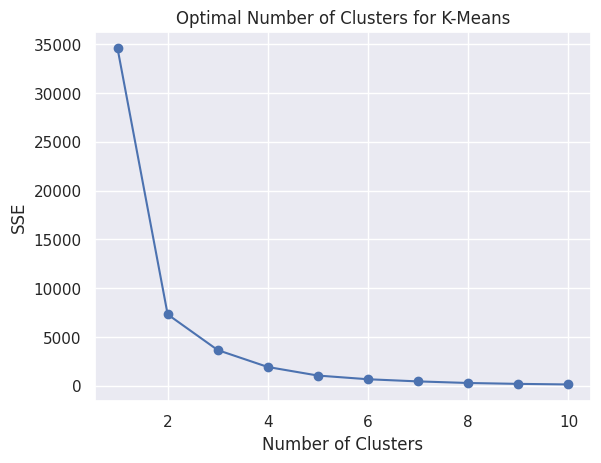

In [9]:
from sklearn.cluster import KMeans

sse = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(football)
    sse.append(km.inertia_) # this loop test the number of clusters against the SSE

# this code plots the elbow curve to find the optimal number of clusters 
plt.plot(range(1,11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Optimal Number of Clusters for K-Means')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


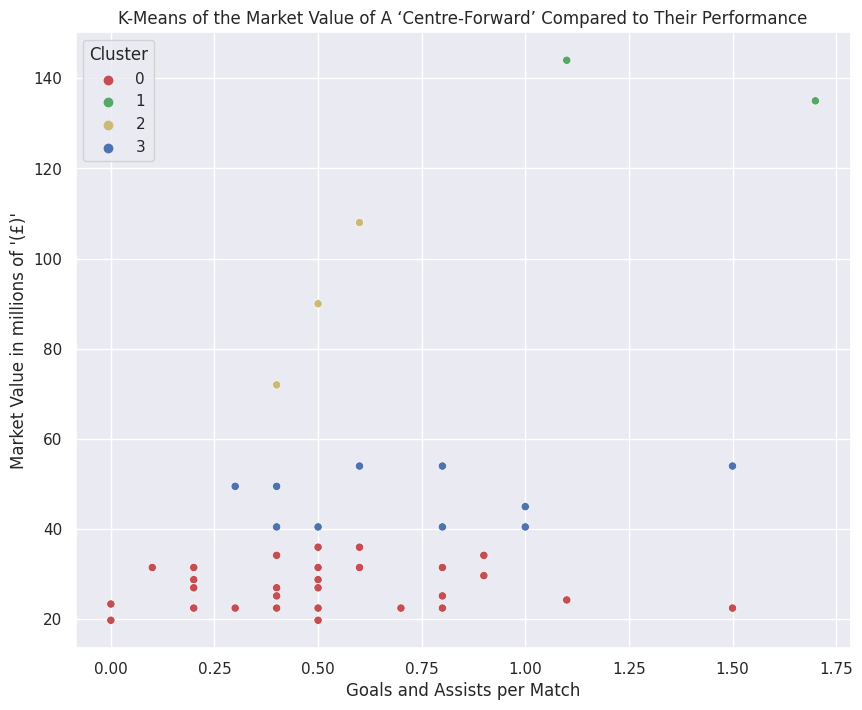

In [10]:
num_clusters = 4

kmeans_model = KMeans(n_clusters=num_clusters, random_state=1)

kmeans_model.fit(football)

labels = kmeans_model.predict(football)
colors = ['r', 'g', 'y','b'] #the colours for each cluster 

football['Cluster'] = labels

# this code Plots the k-means clusters graph 
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Player Performance', y='Market Value', data=football, hue='Cluster', palette=colors)
plt.title('K-Means of the Market Value of A ‘Centre-Forward’ Compared to Their Performance')
plt.xlabel('Goals and Assists per Match')
plt.ylabel("Market Value in millions of '(£)'")
plt.show()

In [11]:
print(labels) # shows which data points belongs to what cluster 
print(colors) # shows the colours used  


[1 1 2 2 2 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
['r', 'g', 'y', 'b']


In [12]:
cluster_groups = football.groupby('Cluster')

corrs = []
for i, group in cluster_groups:
    corr = group['Player Performance'].corr(group['Market Value'])
    corrs.append(corr)

for i in range(num_clusters):
    print(f'Cluster {i+1}: Correlation = {corrs[i]}')

Cluster 1: Correlation = 0.0053404127215520725
Cluster 2: Correlation = -0.9999999999999999
Cluster 3: Correlation = 1.0
Cluster 4: Correlation = 0.19665405960880655


In [13]:
data = football.copy()
data['Cluster'] = labels

averages = data.groupby('Cluster').mean()

print(averages)

         Market Value  Player Performance
Cluster                                  
0           28.182857            0.488571
1          139.500000            1.400000
2           90.000000            0.500000
3           46.800000            0.730000


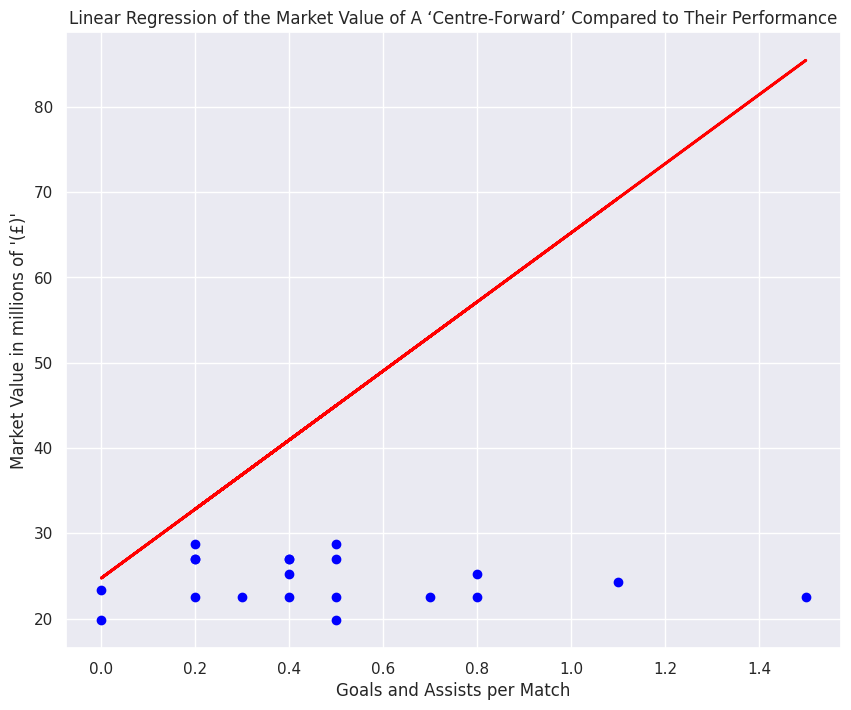

In [14]:
# Defining the independent and dependent variables
X = football['Player Performance'].values.reshape(-1, 1)
y = football['Market Value'].values.reshape(-1, 1)

# Spliting the data into training and test sets
X_train = X[:30]
y_train = y[:30]
X_test = X[30:]
y_test = y[30:]

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)

# This code plots the regression line againast the test data
y_pred = linreg.predict(X_test)
plt.figure(figsize=(10, 8))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression of the Market Value of A ‘Centre-Forward’ Compared to Their Performance')
plt.xlabel('Goals and Assists per Match')
plt.ylabel("Market Value in millions of '(£)'")
plt.show()

In [15]:
r_squared = linreg.score(X_train, y_train) # this code shows the correlation of the regression line 
print("R value:", r_squared)

R value: 0.2430764303274202
